In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
#Loading the dataset

In [3]:
dataset_path = r"C:\Users\pc\PycharmProjects\Week 04 Project 02\IMDB Dataset.csv"
data = pd.read_csv(dataset_path)

In [4]:
#Preprocess the data

In [5]:
reviews = data['review'].values
sentiments = data['sentiment'].values

In [6]:
#Label Encoders

In [7]:
label_encoder = LabelEncoder()
sentiments = label_encoder.fit_transform(sentiments)

In [8]:
#Tokenize the text

In [9]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')  # Use the top 5000 words
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

In [10]:
#Pad sequence to ensure uniform length

In [11]:
max_length = 200  # Choose a reasonable max length for padding
padded_reviews = pad_sequences(sequences, maxlen=max_length, padding='post')


In [12]:
#Splitting data into training and test daata

In [13]:
X_train, X_test, y_train, y_test = train_test_split(padded_reviews, sentiments, test_size=0.2, random_state=42)

In [14]:
#Building the model

In [15]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),  # Embedding layer
    SimpleRNN(64, activation='relu', return_sequences=True),            # RNN layer
    Dropout(0.5),                                                       # Dropout for regularization
    SimpleRNN(32, activation='relu'),                                   # Another RNN layer
    Dense(1, activation='sigmoid')                                      # Output layer for binary classification
])

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
#Compile the model

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
#Training the model

In [19]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 68ms/step - accuracy: 0.5181 - loss: 0.7967 - val_accuracy: 0.5353 - val_loss: 0.6829
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.5446 - loss: 0.6763 - val_accuracy: 0.5856 - val_loss: 0.6419
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.6032 - loss: 0.6296 - val_accuracy: 0.5821 - val_loss: 0.6486
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.6290 - loss: 0.5946 - val_accuracy: 0.5312 - val_loss: 0.6714
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.6685 - loss: 0.5781 - val_accuracy: 0.7750 - val_loss: 0.5168


In [20]:
#Evaluate the model

In [21]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Test Loss: 0.516811192035675, Test Accuracy: 0.7749999761581421


In [22]:
# Plotting training & validation accuracy values

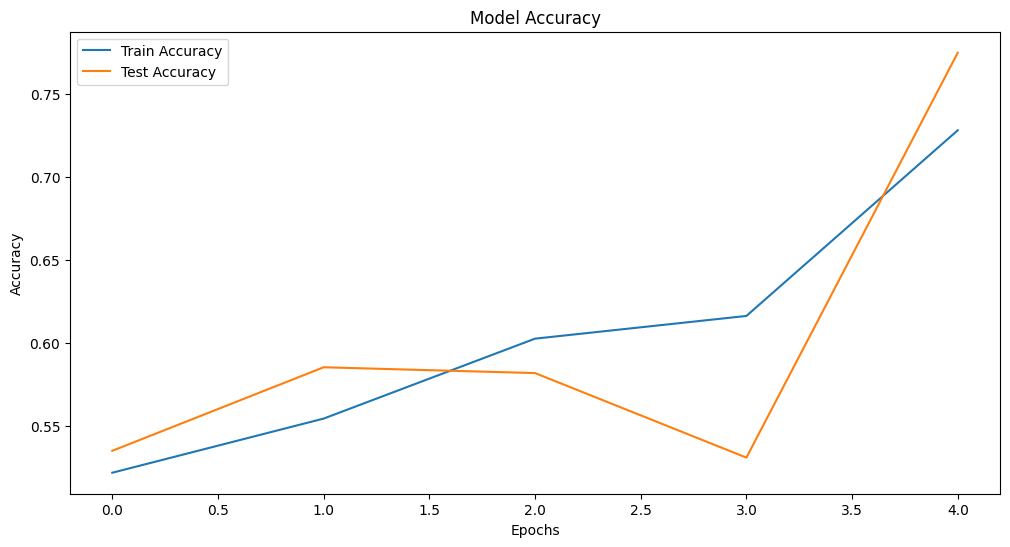

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Plotting training & validation loss values

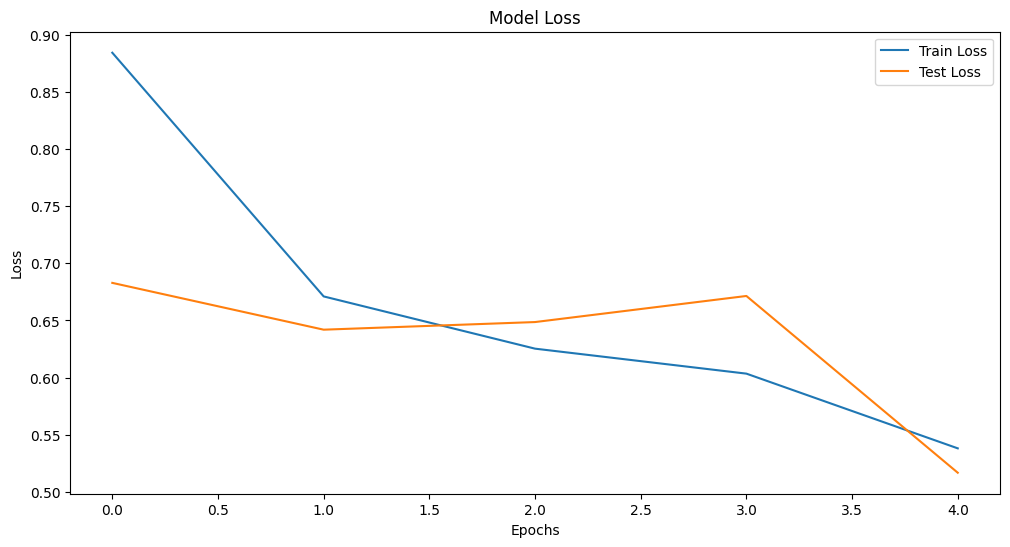

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()